In [2]:
import sys
sys.path.append('../')

import csv
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Lipinski import NumHDonors, NumHAcceptors, NumAromaticRings
import rdkit.Chem as Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Crippen import MolLogP
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

In [3]:
filename = ["../mol_dqn/chemgraph/SMILES_CN1C(=CC2=C(C1=O)C(=NO2)C3=CC=NC=C3)C4=CC=C(C=C4)OC.csv",
            "../mol_dqn/chemgraph/SMILES_no_VINA.csv",
            "../mol_dqn/chemgraph/SMILES_40_include_vina.csv",
            "../mol_dqn/chemgraph/SMILES_40_no_vina.csv",
            "../mol_dqn/chemgraph/SMILES_changing_function_inside_episode.csv",
            "../mol_dqn/chemgraph/SMILES_changing_function_episode.csv",
            "../mol_dqn/chemgraph/SMILES.csv"]

#filename = ["SMILES_beforeSAScore.csv"]

SMILES = []
VINA = []
CNSMPO = []
SASCORE = []
THALF = []
which_file = []

for i, name in enumerate(filename):
    with open(name, "r") as outputdata:
        csv_reader = csv.reader(outputdata, delimiter=',')
        for row in csv_reader:
            if(i!=6):
                SMILES.append(row[4])
            else:
                SMILES.append(row[5])
            VINA.append(float(row[0].strip("[]")))
            CNSMPO.append(float(row[1].strip("[]")))
            SASCORE.append(float(row[2].strip("[]")))
            THALF.append(float(row[3].strip("[]")))
            which_file.append(i)


In [31]:
print(len(SMILES))

700041


In [13]:
SMILES_clean = []
VINA_clean = []
CNSMPO_clean = []
SASCORE_clean = []
THALF_clean = []


for i, s in enumerate(SMILES):
    if (s not in SMILES_clean):
        SMILES_clean.append(s)
        VINA_clean.append(VINA[i])
        CNSMPO_clean.append(CNSMPO[i])
        SASCORE_clean.append(SASCORE[i])
        THALF_clean.append(THALF[i])
    if(i % 1000 == 0):
        print(str(i) + "/" + str(len(SMILES)))

0/700041
1000/700041
2000/700041
3000/700041
4000/700041
5000/700041
6000/700041
7000/700041
8000/700041
9000/700041
10000/700041
11000/700041
12000/700041
13000/700041
14000/700041
15000/700041
16000/700041
17000/700041
18000/700041
19000/700041
20000/700041
21000/700041
22000/700041
23000/700041
24000/700041
25000/700041
26000/700041
27000/700041
28000/700041
29000/700041
30000/700041
31000/700041
32000/700041
33000/700041
34000/700041
35000/700041
36000/700041
37000/700041
38000/700041
39000/700041
40000/700041
41000/700041
42000/700041
43000/700041
44000/700041
45000/700041
46000/700041
47000/700041
48000/700041
49000/700041
50000/700041
51000/700041
52000/700041
53000/700041
54000/700041
55000/700041
56000/700041
57000/700041
58000/700041
59000/700041
60000/700041
61000/700041
62000/700041
63000/700041
64000/700041
65000/700041
66000/700041
67000/700041
68000/700041
69000/700041
70000/700041
71000/700041
72000/700041
73000/700041
74000/700041
75000/700041
76000/700041
77000/700041

594000/700041
595000/700041
596000/700041
597000/700041
598000/700041
599000/700041
600000/700041
601000/700041
602000/700041
603000/700041
604000/700041
605000/700041
606000/700041
607000/700041
608000/700041
609000/700041
610000/700041
611000/700041
612000/700041
613000/700041
614000/700041
615000/700041
616000/700041
617000/700041
618000/700041
619000/700041
620000/700041
621000/700041
622000/700041
623000/700041
624000/700041
625000/700041
626000/700041
627000/700041
628000/700041
629000/700041
630000/700041
631000/700041
632000/700041
633000/700041
634000/700041
635000/700041
636000/700041
637000/700041
638000/700041
639000/700041
640000/700041
641000/700041
642000/700041
643000/700041
644000/700041
645000/700041
646000/700041
647000/700041
648000/700041
649000/700041
650000/700041
651000/700041
652000/700041
653000/700041
654000/700041
655000/700041
656000/700041
657000/700041
658000/700041
659000/700041
660000/700041
661000/700041
662000/700041
663000/700041
664000/700041
665000

In [33]:
print(len(SMILES_clean))

432519


In [52]:
SMILES_output = []
VINA_output = []
CNSMPO_output = []
SASCORE_output = []
THALF_output = []

for i, s in enumerate(SMILES_clean):
    if (THALF_clean[i] > 4.25 and VINA_clean[i] < -8 and CNSMPO_clean[i] > 5.5 and SASCORE_clean[i] < 5 ):
    #if (VINA_clean[i] < -9 and CNSMPO_clean[i] > 5):
        SMILES_output.append(s)
        VINA_output.append(VINA_clean[i])
        CNSMPO_output.append(CNSMPO_clean[i])
        SASCORE_output.append(SASCORE_clean[i])
        THALF_output.append(THALF_clean[i])

print(len(SMILES_output))

20


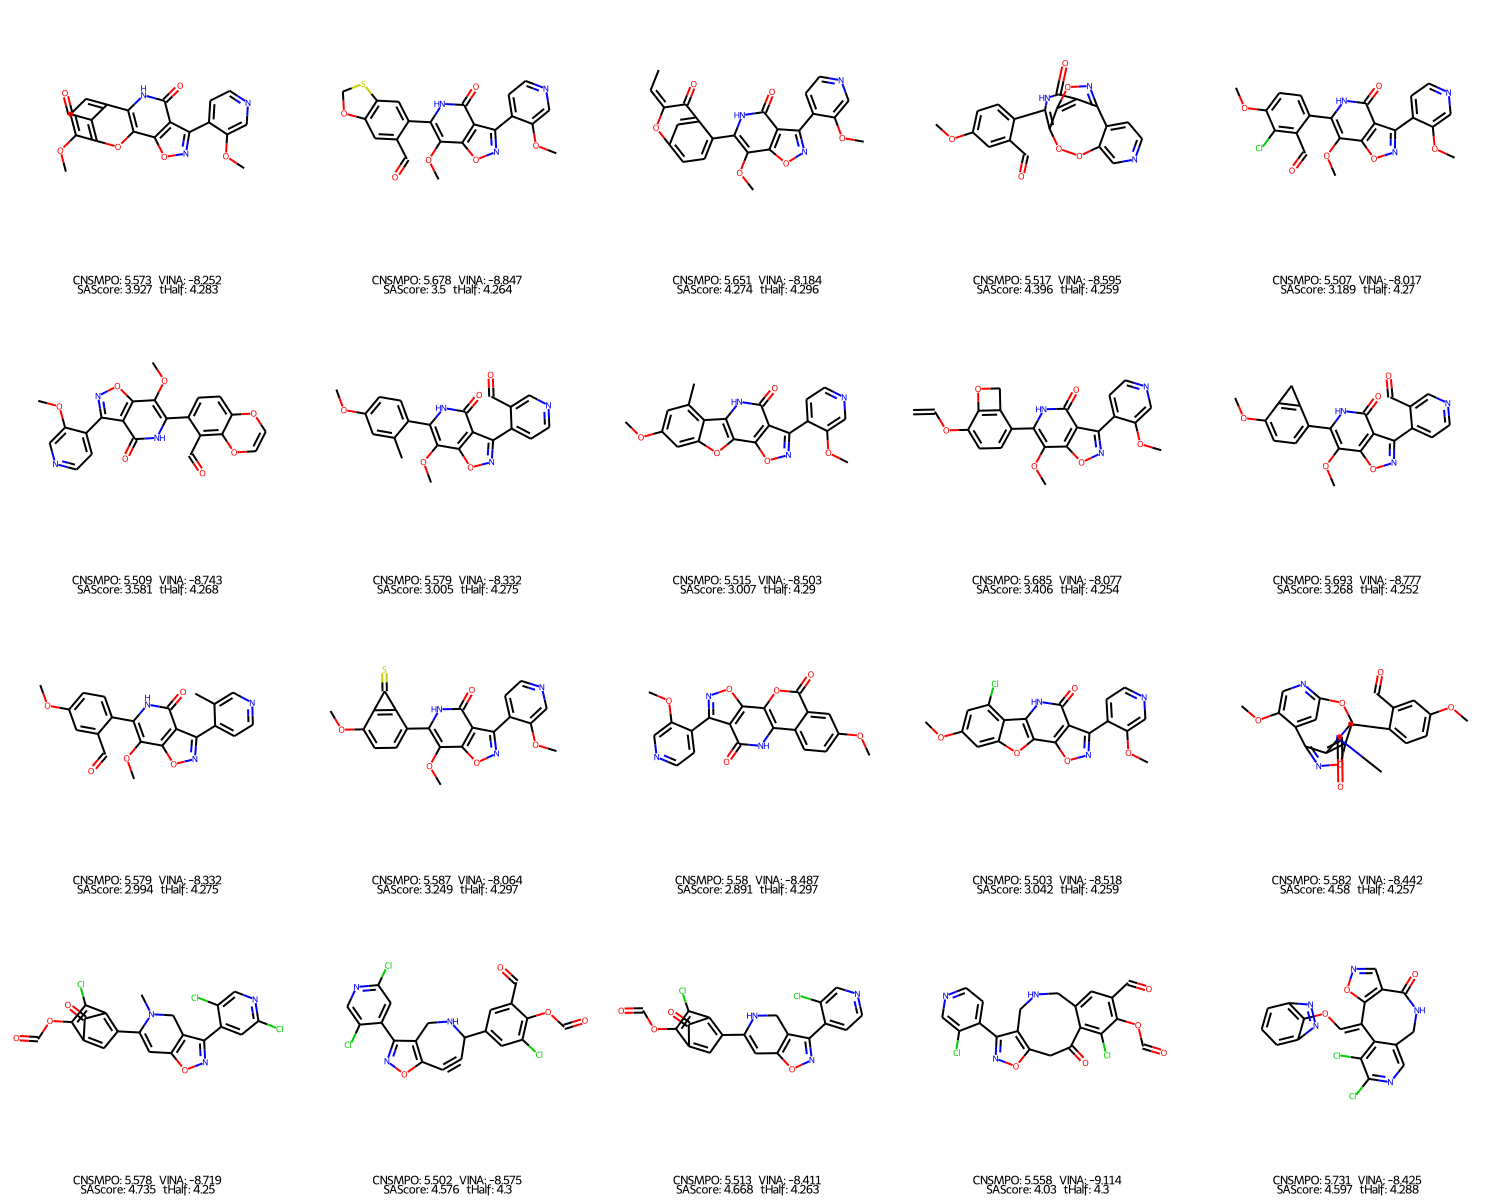

In [53]:
Mols = [Chem.rdmolfiles.MolFromSmiles(mol) for mol in SMILES_output]
legend = []
for i, mol in enumerate(SMILES_output):
    legend.append("CNSMPO: " + str(round(CNSMPO_output[i],3)) + "\t" + "VINA: " +  str(round(VINA_output[i],3)) + "\n" + "SAScore: " + str(round(SASCORE_output[i],3))+ "\t" + "tHalf: " + str(round(THALF_output[i], 3)))



Chem.Draw.MolsToGridImage(Mols, molsPerRow=5, subImgSize=(300, 300), maxMols=1000, legends=legend)


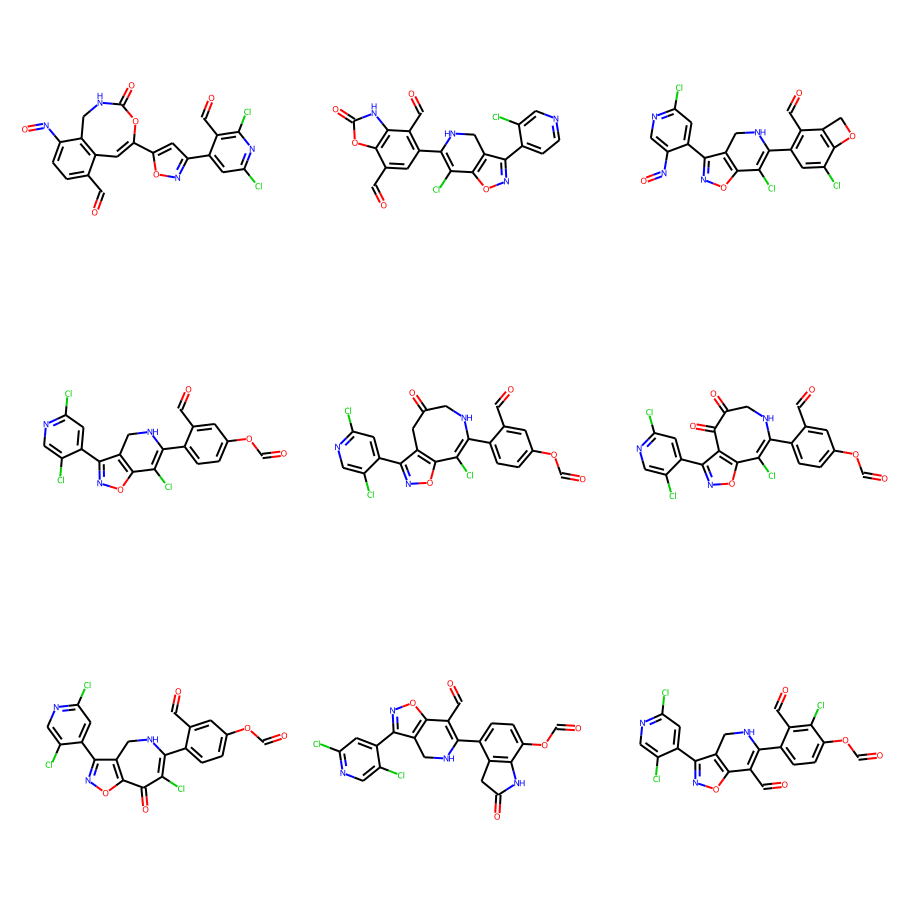

In [51]:
output = list(zip(THALF_output, SMILES_output))

output.sort(reverse=True)

#print(output)

THALF_output_sorted = [t for t, s in output]
SMILES_output_sorted = [s for t, s in output]

Mols_sorted = [Chem.rdmolfiles.MolFromSmiles(mol) for mol in SMILES_output_sorted]

Mols_sorted_selected = [Mols_sorted[0],Mols_sorted[2],Mols_sorted[3],Mols_sorted[7],
                        Mols_sorted[8],Mols_sorted[9],Mols_sorted[10],Mols_sorted[11],
                        Mols_sorted[13]]
Chem.Draw.MolsToGridImage(Mols_sorted_selected, molsPerRow=3, subImgSize=(300, 300), maxMols=1000)


In [46]:
with open('OutputMoleculesSorted.csv', 'w') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(["SMILES", "THALF"])
    outputtuple = zip(SMILES_output_sorted, THALF_output_sorted)
    for i in outputtuple:
        datawriter.writerow(i)

In [5]:
initial_molecule = "CN1C(=CC2=C(C1=O)C(=NO2)C3=CC=NC=C3)C4=CC=C(C=C4)OC"
SIMILARITIES = []

from rdkit import DataStructs

# mols = [Chem.MolFromSmiles(initial_molecule), Chem.MolFromSmiles(SMILES[1])]

# fps = [Chem.RDKFingerprint(x) for x in mols]

# DataStructs.FingerprintSimilarity(fps[0],fps[1])

for i, mol in enumerate(SMILES):
    mols = [Chem.MolFromSmiles(initial_molecule), Chem.MolFromSmiles(mol)]
    fps = [Chem.RDKFingerprint(x) for x in mols]
    SIMILARITIES.append(DataStructs.TanimotoSimilarity(fps[0],fps[1]))
    if(i % 1000 == 0):
        print(str(i) + "/" + str(len(SMILES)))

0/700041
1000/700041
2000/700041
3000/700041
4000/700041
5000/700041
6000/700041
7000/700041
8000/700041
9000/700041
10000/700041
11000/700041
12000/700041
13000/700041
14000/700041
15000/700041
16000/700041
17000/700041
18000/700041
19000/700041
20000/700041
21000/700041
22000/700041
23000/700041
24000/700041
25000/700041
26000/700041
27000/700041
28000/700041
29000/700041
30000/700041
31000/700041
32000/700041
33000/700041
34000/700041
35000/700041
36000/700041
37000/700041
38000/700041
39000/700041
40000/700041
41000/700041
42000/700041
43000/700041
44000/700041
45000/700041
46000/700041
47000/700041
48000/700041
49000/700041
50000/700041
51000/700041
52000/700041
53000/700041
54000/700041
55000/700041
56000/700041
57000/700041
58000/700041
59000/700041
60000/700041
61000/700041
62000/700041
63000/700041
64000/700041
65000/700041
66000/700041
67000/700041
68000/700041
69000/700041
70000/700041
71000/700041
72000/700041
73000/700041
74000/700041
75000/700041
76000/700041
77000/700041

RDKit WARNING: [14:19:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [14:19:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [14:19:51] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


312000/700041
313000/700041
314000/700041
315000/700041
316000/700041
317000/700041
318000/700041
319000/700041
320000/700041
321000/700041
322000/700041
323000/700041
324000/700041
325000/700041
326000/700041
327000/700041
328000/700041
329000/700041
330000/700041
331000/700041
332000/700041
333000/700041
334000/700041
335000/700041
336000/700041
337000/700041
338000/700041
339000/700041
340000/700041
341000/700041
342000/700041
343000/700041
344000/700041
345000/700041
346000/700041
347000/700041
348000/700041
349000/700041
350000/700041
351000/700041
352000/700041
353000/700041
354000/700041
355000/700041
356000/700041
357000/700041
358000/700041
359000/700041
360000/700041
361000/700041
362000/700041
363000/700041
364000/700041
365000/700041
366000/700041
367000/700041
368000/700041
369000/700041
370000/700041
371000/700041
372000/700041
373000/700041
374000/700041
375000/700041
376000/700041
377000/700041
378000/700041
379000/700041
380000/700041
381000/700041
382000/700041
383000

RDKit WARNING: [14:25:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [14:25:57] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


441000/700041
442000/700041
443000/700041
444000/700041
445000/700041
446000/700041
447000/700041
448000/700041
449000/700041
450000/700041
451000/700041
452000/700041
453000/700041
454000/700041
455000/700041
456000/700041
457000/700041
458000/700041
459000/700041
460000/700041
461000/700041
462000/700041
463000/700041
464000/700041
465000/700041
466000/700041
467000/700041
468000/700041
469000/700041
470000/700041
471000/700041
472000/700041
473000/700041
474000/700041
475000/700041
476000/700041
477000/700041
478000/700041
479000/700041
480000/700041
481000/700041
482000/700041
483000/700041
484000/700041
485000/700041
486000/700041
487000/700041
488000/700041
489000/700041
490000/700041
491000/700041
492000/700041
493000/700041
494000/700041
495000/700041
496000/700041
497000/700041
498000/700041
499000/700041
500000/700041
501000/700041
502000/700041
503000/700041
504000/700041
505000/700041
506000/700041
507000/700041
508000/700041
509000/700041
510000/700041
511000/700041
512000

RDKit WARNING: [14:30:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.
RDKit WARNING: [14:30:52] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


547000/700041
548000/700041
549000/700041
550000/700041
551000/700041
552000/700041
553000/700041
554000/700041
555000/700041
556000/700041
557000/700041
558000/700041
559000/700041
560000/700041
561000/700041
562000/700041
563000/700041
564000/700041
565000/700041
566000/700041
567000/700041
568000/700041
569000/700041
570000/700041
571000/700041
572000/700041
573000/700041
574000/700041
575000/700041


RDKit WARNING: [14:32:38] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


576000/700041
577000/700041
578000/700041
579000/700041


RDKit WARNING: [14:32:54] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


580000/700041
581000/700041
582000/700041
583000/700041
584000/700041
585000/700041
586000/700041
587000/700041
588000/700041
589000/700041
590000/700041
591000/700041
592000/700041
593000/700041
594000/700041
595000/700041
596000/700041
597000/700041
598000/700041
599000/700041
600000/700041
601000/700041
602000/700041
603000/700041
604000/700041
605000/700041
606000/700041
607000/700041
608000/700041
609000/700041
610000/700041
611000/700041
612000/700041
613000/700041
614000/700041
615000/700041
616000/700041
617000/700041
618000/700041
619000/700041
620000/700041
621000/700041
622000/700041
623000/700041
624000/700041
625000/700041
626000/700041
627000/700041
628000/700041
629000/700041
630000/700041
631000/700041
632000/700041
633000/700041
634000/700041
635000/700041
636000/700041
637000/700041
638000/700041
639000/700041
640000/700041
641000/700041
642000/700041
643000/700041
644000/700041
645000/700041
646000/700041
647000/700041
648000/700041
649000/700041
650000/700041
651000

60000
60000
120000
60041
120000
120000
160000


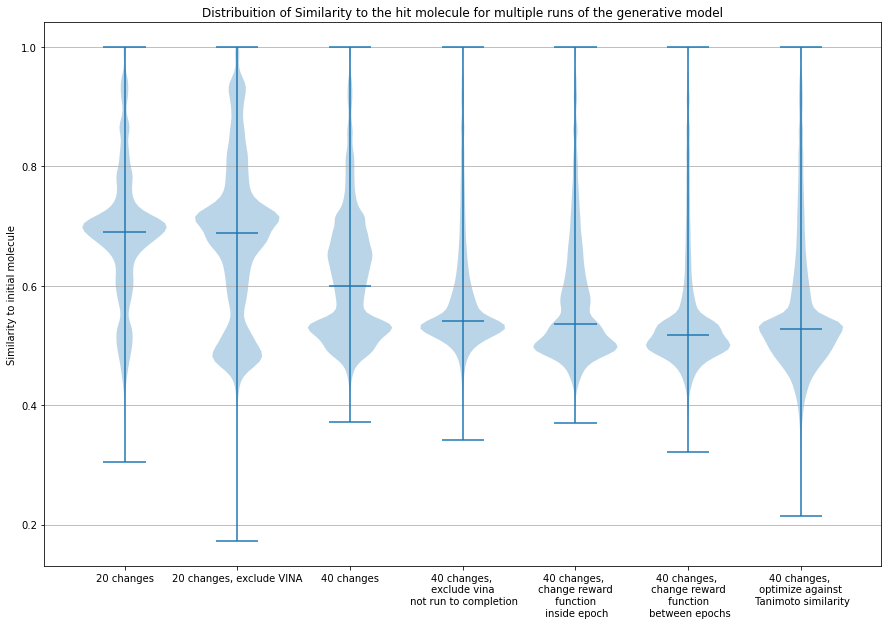

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 10))

data = [[], [], [], [], [], [], []]

for i, sim in enumerate(SIMILARITIES):
    data[which_file[i]].append(sim)

for i in data:
    print(len(i))
    
    
data_end = [i[-8000::] for i in data]

# plot violin plot
ax.violinplot(data,
              showmeans=False,
              showmedians=True,
              widths = 0.75)
ax.set_title('Violin plot')


# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xticks([y + 1 for y in range(len(data))])
ax.set_xticklabels(['20 changes', '20 changes, exclude VINA', '40 changes', '40 changes, \n exclude vina \n not run to completion', '40 changes, \n change reward \n function \n inside epoch', '40 changes, \n change reward \n function \n between epochs', '40 changes, \n optimize against \n Tanimoto similarity'])
ax.set_ylabel("Similarity to initial molecule")
ax.set_title("Distribuition of Similarity to the hit molecule for multiple runs of the generative model")
plt.show()

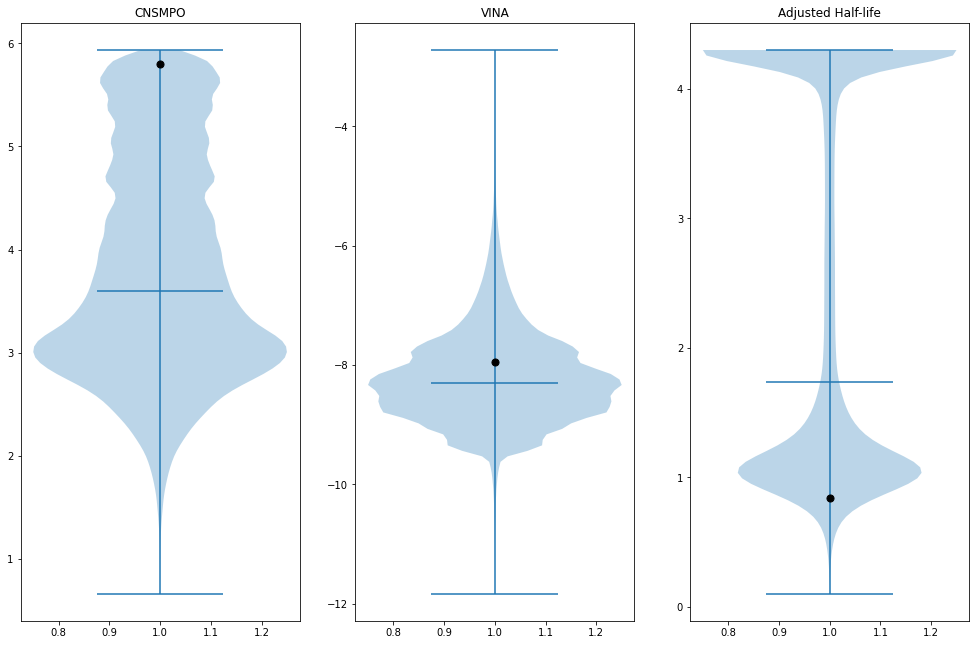

In [11]:
# plot violin plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 11))

axs[0].violinplot(CNSMPO,
                  showmeans=False,
                  showmedians=True)

axs[0].set_title('CNSMPO')

axs[0].scatter(1,5.8,c="black",s=50,zorder=3)


axs[1].violinplot(VINA,
                 showmeans=False,
                 showmedians=True)
axs[1].set_title('VINA')

axs[1].scatter(1,-7.95,c="black",s=50,zorder=3)

axs[2].violinplot(THALF,
                 showmeans=False,
                 showmedians=True)
axs[2].set_title('Adjusted Half-life')

axs[2].scatter(1,0.84,c="black",s=50,zorder=3)



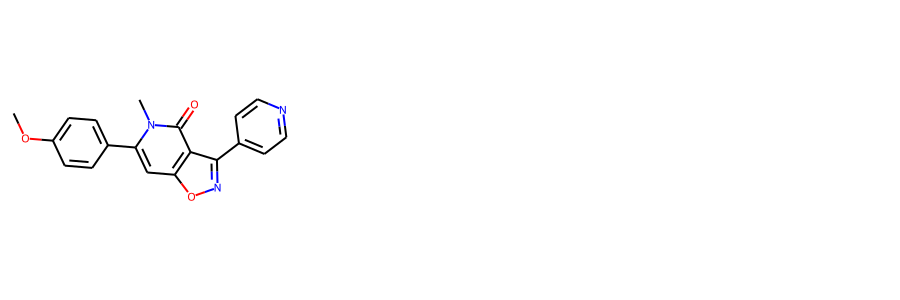

In [12]:
s = "CN1C(=CC2=C(C1=O)C(=NO2)C3=CC=NC=C3)C4=CC=C(C=C4)OC"
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s)], subImgSize=(300, 300))